# Lecture 2: Speech Signal Analysis

- Speech signal are continuous signals, continuous in both time and amplitude. That is not usable by machines, it cannot be processed digitally, machines are discrete. That is why we discretize in time, but also amplitude (sampling & quantization respectively).
- For Speech, the bandwidth is around 8 kHz, almost all the information is contained within this range, bringing the **Nyquist Frequency** to 16 kHz, being the **Microphone Speech Quality**.
- For Telephone, the bandwith is around 4 kHz, this is good enough to transmit all of the words spoken through the telephone, bringing the **Nyquist Frequency** to 8 kHz, being the **Telephone Speech Quality**.
- Bandwidth is fixed by filtering the signal, then we can safely sample the signal.
- Property: Whenever we sample in the time domain, the signal periodic in the frequency domain, and when we sample in the frequency domain, there will be periodicity in the time domain.
- To decide the bits of quantization: we normally want to minimize the needed bits to reduce memory usage. We look at the dynamic range. Information theory, coding ... bring us the formula: 1 bit represents about 6 dB. For Speech, the intensity level is about 60 dB, to which we need 10 bits, we normalized to 16 bits, a short integer, 2 bytes.
- Another statistics trick they added to reduce the number of bits they send to convey information: the probability to get small values is significantly bigger than the probability to get high values, so they performed a non-uniform quantization, they took the log of the sample values (explanding the low values and compressing the high values), reducing the dynamic range, and then quantizing the data (allowing to go from 10 bits/sample to 8 bits/sample) (1st standard) $$8 kHz * 8 bits/sample = 64 kbps$$ 
- **Information Theory**: We have a set of k symbols, each with a probability $p_{k}$. Information of symbol k $$I_{k} = -log(p_{k})$$ and the joint probability of having two symbols *A* & *B*, we have (assuming independancy) $$P(A, B) = P(A) * P(B)$$ And the information, since it is a log, becomes an addition of probabilities, **AND** it is positive, and since we work in bits, the log is in base of 2. To find the average number of bits needed, we use the formula $$Entropy = \sum_{k} -p_{k}*I_{k}$$ For our specific case in speech, we do not know the distribution, and the probabilities are not uniform.
- Comparing probabiliy distributions between symbols in German & English, we can use KL-divergence or other methods $$\mathbf{G_{p}} = \begin{pmatrix} p^{g}_{1} \\ ... \\ p^{g}_{k} \end{pmatrix} \mathbf{E_{p}} = \begin{pmatrix} p^{e}_{1} \\ ... \\ p^{e}_{k} \end{pmatrix}$$ $$KL-divergence(\mathbf{G_{p}}, \mathbf{E_{p}}) = \sum_{k=1}^{K} p^{g}_{k} * log(\frac{p^{g}_{k}}{p^{e}_{k}})$$ $$ = \sum_{k=1}^{K} p^{g}_{k} * log(p^{g}_{k}) - \sum_{k=1}^{K} p^{g}_{k} * log(p^{e}_{k})$$ The second term is the cross-entropy, giving us the number of extra bits we need to code English symbols compared to German coding.
- Another way to quantize, is to choose a sampling rate much higher than the Nyquist rate, from a sample to the next, if the sample's amplitude is higher, we set the bit to 1, if less, the bit is set to 0, which needs all samples to be infinitely close to one another, which is called 1-bit quantization. 


### Speech Acquisition

- We detect the acoustics signal, convert it to an electrical analog signal.
- We use a low-pass filter on the electrical analog signal with a cut-off frequency $F_c$, being the wanted bandwidth of the signal.
- We then discretize the low-pass-filtered electrical signal accross time (Sampling) & Amplituded-wise (Quantization).

### Sampling

For sampling, we would need to figure out the bandwidth, in order to determine the Nyquist rate (2 * Bandwidth).

- We apply the Nyquist-Shannon sampling theorem $$Sample\space Rate = 2 * Bandwidth\space Rate$$
- Apply a low-pass filter on the electrical signal with a cut-off frequency $F_c$
    + **Telephone Speech Quality**: $F_c = 4000\space Hz$ (dictated by analog speech transmission bandwidth)
    + **Microphone Speech Quality**: $F_c = 8000\space Hz$
    + **CD Speech Quality**: $F_c = 22050\space Hz$ (covers the entire auditory frequency range)
- We then sample the low-pass-filtered electrical signal at Frequency $F_s = 2 * F_c$
    + **Telephone Speech**: $8000\space Hz$
    + **Microphone Speech**: $16000\space Hz$
    + **CD Speech**: $44100\space Hz$

This guarantees a perfect reconstruction of the analog signal without aliasing.

### Quantization

- Sampling yields discrete signal, ie. time is discrete but smplitude is continuous.
- So we need to quantize the amplitude of each sample to get the digital signal
- How many bits do we need to quantize? 8 bits or 16 bits?
    + 8 bits: minimum amplitude is 1 and maximum is 255
        - loudest sound = $20 * log_{10}(\frac{255}{1}) = 48\space dB$ 
    + 16 bits: minimum ampltude is 1 and maximum is 65535
        - loudest sound = $20 * log_{10}(\frac{65535}{1}) = 96\space dB$
- Digital Speech Signal can be storedand read as an array of short integers (2 bytes)
- Bitrate (bits per second) = $F_s * (number\space of\space bits\space per\space sample)$
    + **Telephone Speech**: $8000 * 16\space bps$ (2 bytes per sample) or $8000 * 8\space bps$ (1 byte per sample through dynamic range companding, see $\mu$-law algorithm, $A$-law algorithm)
    + **Microphone Speech**: $16000 * 16\space bps$
    + **CD Quality Speech**: $44100 * 16\space bps$

### Time domain Speech Signal

Duration of different sounds are not equal. 

We can analyze different phonemes and their characteristics.

We can analyze that vowels have high energies compared to consonants (Dyanmic range is high and/or duration is high).

We can clearly see the difference between voiced and unvoiced phonemes, where unvoiced phonemes are where the air is just passing through the folds (aperiodic excitation), and the voiced phonemes are where the excitation is periodic (in simpler terms, repeated periodically). 

A voiced phoneme, is produced by a complex tone, being a mix of simple tones.
A simple tone is a pure tone, a single frequency $f_0$ (the fundamental frequency), represented by a perfect sine wave.
While a complex tone is composed of the fundamental frequency $f_0$, and a series of additional frequencies called **overtones** or **harmonics**, being integer multiples of the fundamental frequency. The number & intensity of these harmonics determine the sound's timbre or tone quality.

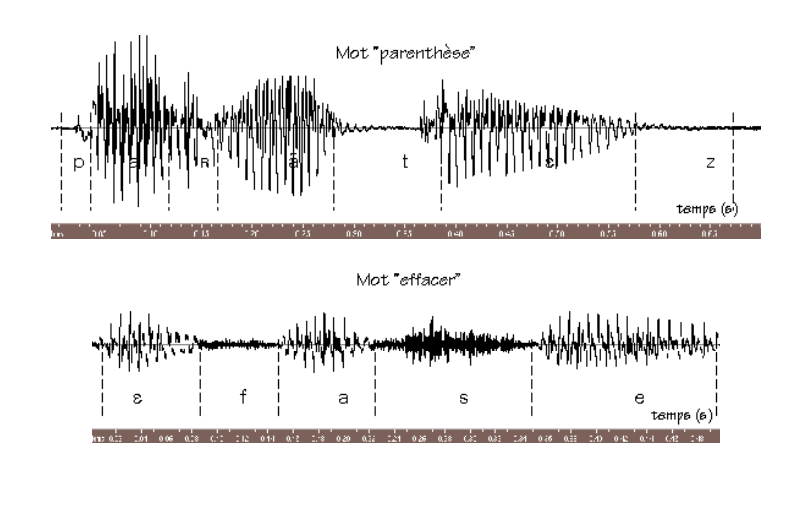

This is a stochastic signal, not a deterministic signal, meaning it has a random probability distribution that cannot be predicted precisely.

- **Mean**: $\mu_{s} = lim_{N\rightarrow \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} s(n)$

    + DC component can be removed by subtracting each sample by the mean of the signal.
    + The mean of the signal should be 0, if not, needs to be set (offset).

- **Variance**: $\sigma^{2}_{s} = lim_{N\rightarrow \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} s^{2}(n)$
- **Signal Energy at time n**: $E(n) = \sum_{k=-N}^{N} s^{2}(n+k)$

Zero crossing rate differs for vowels and consonants (in particular fricatives).

Fricatives have a very high zero crossing rate, vowels have a low zero crossing rate.

Once we have a zero-mean signal, the variance of the signal becomes the energy of the signal.

#### Autocorrelation

Finding a relation between statistical variables, correlates the signal to itself. $$\frac{n\sum \mathbf{X}\mathbf{Y}\space -\space (\sum \mathbf{X})(\sum \mathbf{Y})}{\sqrt{(n\sum \mathbf{X}^{2}\space - \space (\sum \mathbf{X})^{2})\space * \space (n\sum \mathbf{Y}^{2}\space - \space(\sum \mathbf{Y})^{2})}}$$ Or to simplify for us $$\frac{\sum_{n}\mathbf{X_{n}}\mathbf{Y_{n}}}{\sqrt{\sum_{n}{(\mathbf{X_{n}}-\bar{X})}^{2} \sum_{n}{(\mathbf{Y_{n}}-\bar{Y})}^{2}}}$$ Or in other terms $$R_{x}(k) = lim_{N\rightarrow \infty} \frac{1}{2N+1} \frac{\sum_{n=-N}^{N}s(n)s(n+k)}{\sqrt{\sum_{n}(s(n)-\bar{s})^{2} \space \sum_{n}(s(n)-\bar{s})^{2}}}$$ Since the mean of the signal is 0. $$R_{x}(k) = lim_{N\rightarrow \infty} \frac{1}{2N+1} \frac{\sum_{n=-N}^{N}s(n)s(n+k)}{\sqrt{\sum_{n}s(n)^{2} \space \sum_{n}s(n)^{2}}}$$ Where the coefficients in the denominator are the signal energies.

Autocorrelation measures the similarity between a signal and a delayed version of itself, quantifying the relationship between a data point and its previous observations in a time series. R(1) indication, given sample at time n, how much can I predict the sample at time n+1, the same for R(2), given sample at time n, how much can I predict the sample at time n+2, and so on.

The Autocorrelation Coefficient becomes: 
$$RC_{x}(k)=R_{x}(k)/R_{x}(0)$$

Autocorrelation is periodic and symmetrical if the signal is periodic, R(1) = R(-1).

For voiced segments, autocorrelation is high, which makes sense, since voiced segments are periodic excitations, and can be well predicted and modelled, unlike unvoiced segments, where autocorrelation is low, which also makes sense, since the air is just passing through the folds once and abruptly.

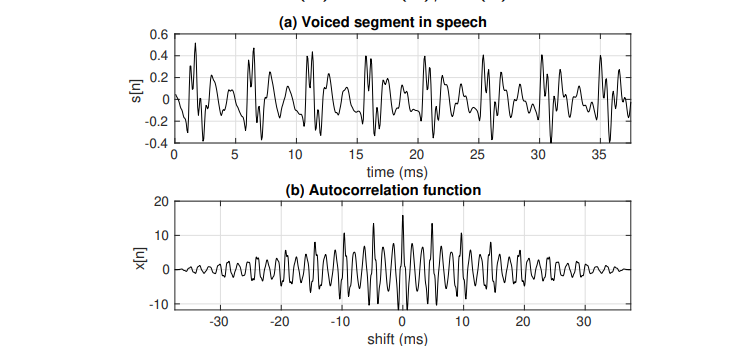

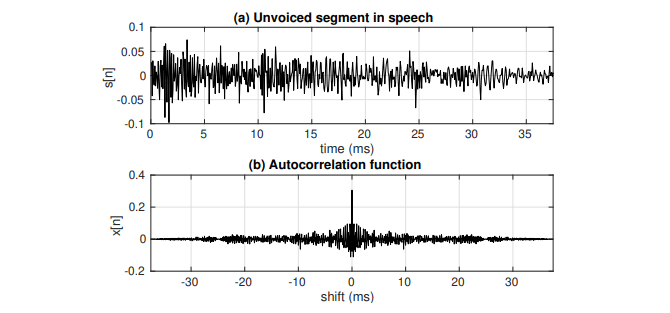

- The autocorrelation signal (function) is periodic if the signal is periodic (property used for pitch frequency estimation)
- The peak of the autocorrelation signal occurs at time 0, ie. $R_{x}(0)$ measuring the energy of the signal.
- We can threshold the second peak $RC_{x}(k)$ to detect if the speech signal is voiced or unvoiced.
- For unvoiced segments, there is no fundamental frequency.
- For voiced segmented, the fundamental frequency is inversely related to the location of the second peak $F_{0} = \frac{1}{T_{0}}$. $T_{0}$ being the time lag between the central peak and the second peak.
    + Between 70 and 250 Hz for men
    + Between 150 and 400 Hz for women
    + Between 200 and 600 Hz for children

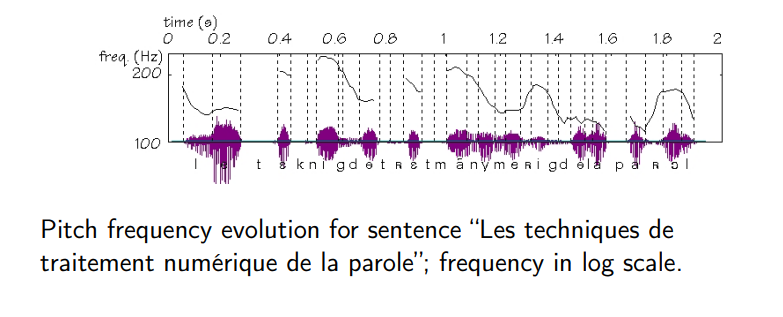



For a signal with zero-mean, the signal's variance is the signal energy.

DCT (Discrete Cosine Transform) is simply the PCA (Principal Component Analysis) of the signal.

- PCA gives us the most significant component, the component that explains the most variance, or the maximum variance dimensions.
- DCT presents the eigenvectors.

- If we have two (or multple microphones) (microphone array), we can get the direction of arrival from the delay of the signal compared to one another (cross-correlation).

- Auto-correlation measures the similarity of a signal with a delayed copy of itself. So its main purpose is to find repeating patterns or periodicities within a single signal.

- Cross-correlation measures the similarity between two different signals. It is used to find features in one signal that are also present in the other.

### Signal Processing

- Impulse Response
- Sometimes the input is not just one impulse, but a much more complex signal, if the system is LTI (Linear Time-Invariant) (linearity $aX + Y \rightarrow aV(X) + V(Y)$) (Time-Invariance V(n) does not change over time), we can easily estimate the output $S(n) = E(n) \ast V(n)$ (S is for speech (Output), E is for excitation (Input) & V is for vocal tract (System))
- Convolution is when we flip the first signal in time (so it goes from $-\infty \rightarrow 0$) (V(-n)) and then perform cross-correlation with the second signal. 
- The problem here is the fact that our vocal tract cannot be modelled as a Linear Time-Invariant System. Since it changes all the time (eg. voiced vs unvoiced phonetics). That's exactly why we window our signals, to shorten the duration, in order for the assumption of the system being LTI to hold.
- The window is a hyperparameter to choose well. The shape of the window is also an important aspect of the hyperparameter to keep in mind. All samples to be equally weighted? (rectangle window) Or not equally weighted? (triangle or hann window)

## Fourier Transform

- Fourier transform of a signal: $$S(\omega) = \sum_{n=-\infty}^{n=+\infty} s(n) \exp^{-j\omega n}$$
- We are projecting the signal along different sines & cosines. Which frequencies are present and how strong are they (the energy of that frequency).
- For a windowed signal, the Fourier transform becomes: $$S'(\omega) = \sum_{n=-\infty}^{n=+\infty} [s(n) w(n)] \exp^{-j\omega n}$$
$$ <=> S'(\omega) = S(\omega) \ast W(\omega) $$
- For a window, its representation in the frequency space, it will have a main lobe, with its width, as well as side lobe(s). We want the side lobe to be as low as possible. We want the frequency estimated, selected by the main lobe, we want the effect of the side lobe(s) on it to be minimal. How well we select the frequency depends on the main lobe width (depending on the shape & length of the window). We would ideally want a property like a one peak signal with zeroes everywhere (impulse function), so we would want to shorten the window as much as possible.
    + Rectangle window has a shorter main lobe width than the hamming window, but the hamming window has a much weaker side lobe. The side lobes go high because of the sharp transition of the rectangular window function.
    + Hamming window is practically good enough.
- A signal with Frequency $F = \frac{1}{T_{p}}$. When we take the Fourier transform, we get a single impulse located on its frequency, with its amplitude at $+\infty$. Now when taking the Fourier transform of the same signal, but after being windowed, the single impulse tends to get "less perfect" and tends to be a bit wider and not having a peak at $+\infty$. Increasing the width of the window, to include more periods/cycles, would result in a more precise estimate of the frequency, but at the same time, the system cannot be considered as TI.
- The excitation going through the vocal tract, creates resonance patterns (formants) based on the shape of the vocal tract. Their frequencies depend on the phonetic produced, and they are usually much higher than fundamental frequencies (80 Hz ~ 400 Hz), so they would need a much lower time period to detect the frequency of the signal. And we want to observe both, formants (high $\rightarrow$ shorter time durations) as well as pitches (fundamental frequencies) (low $\rightarrow$ longer time durations). So we consider the lowest frequency (80 Hz), we want more than one cycle, (2~3 cycles for the pitch, assumption) (we might need more cycles (4, 5 or even 6 cycles)). If we only want to observe formants, we would need a higher frequency, or lower time durations. A range of (22ms ~ 30ms).
- For Speech Recognition a 10ms shift between windows is enough, for Speech Synthesis, we would need a shorter window, rather 5ms. How closely we want to look at the changes in the vocal tract system.

### Conclusion for Windowing

There has to be a decision made for the accuracy, and here comes the tradeoff, between accuracy in time & accuracy in frequency.

### Taking a Step Back

Considering that speech is already windowed, we have established that the Speech Signal $$s(n) = e(n) \ast v(n)$$ And that the Fourier transform of such a signal is $$S(\omega) = \sum_{n=-\infty}^{n=+\infty} s(n) \exp^{-j\omega k}$$ When we develop the formula: $$S(\omega) = \sum_{n=-\infty}^{n=+\infty} [e(n)\ast v(n)]\exp^{-j\omega k}$$ And using the property of the Fourier transform, we find: $$S(\omega) = E(\omega).V(\omega)$$ being that the signal frequency response spectrum is equal to the excitation frequency response multiplied by the vocal tract system frequency response.

Excitation can be periodic or random, for voiced & unvoiced phonetics respectively. When it is periodic, it is not a sine function, it is rather a complex tone, a mix of weighted sine functions. 

For the periodic excitation signal is close to a constant pressure, close to a complex tone rather than a sine tone, with a periodic drop in pressure, the difference between two pressure drops is $T_p$ we can take the Fourier transform of the signal and get something rather close to this: 

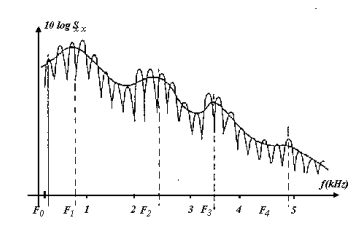

Containing multiples of the fundamental frequency (ignoring the enveloppe of the signal).

While as for the random excitation signal (unvoiced phonetics), we get a random sine tone. The Fourier transform of the signal, we get a random sine tone function. As opposed to perfect white noise, it does not have the same power for all frequencies.


For the vocal tract system, the Fourier transform of the signal would contain peaks for each of the formants of the phonetic pronounced (different for voiced & unvoiced phonetics). Outside of these peaks at the formants frequencies $F_1$, $F_2$, the signal tends to be equal to 0.
The reason we don't have sharp resonance frequencies, (aka. perfect resonance frequencies), is the fact that our frequencies are not pure, they are complex tones, they are not synthesizers.

Now as for the resulting signal, we multiply the Fourier transform of both signal, and we get a signal, with the same slope as the Excitation signal $E(\omega)$, and the peaks will correspond to the integer multiples of the fundamental frequency $F_0$, with an envelope, that will have peaks for the formants of the phonetics spoken $F_1$, $F_2$, etc...

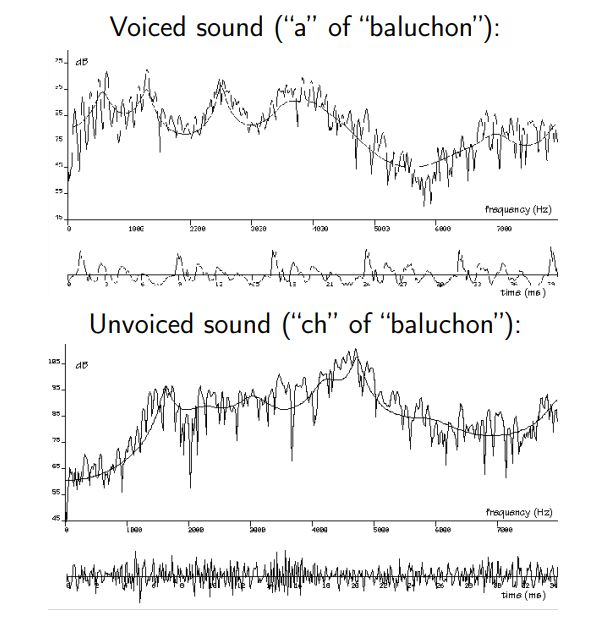

Unvoiced sounds, we will not have the smooth clear harmonic structure, the patterns. We will be able to see the formants, but as for the pitch effect, it will not be clear in the signal.

For the spectrogram, it is the plot where we have the time, frequency as axis, but also the magnitude as the third dimension depending on the given time $T$ & frequency $F$, when we plot the magnitude of the window, in respect to the frequency, and we plot the windows sequentially (advancing in time). We can see how energy in different frequencies are changing over time. Humans can decide what is being spoken (with a lot of expertise) from just reading the spectrogram, and this is exactly what we want to teach the machine. 

- The Power Spectrogram is taking the square of the signal, replacing the speech signal by the excitation signal convolutionized by the vocal tract system signal (cross-correlation), and then taking the Fourier transform (complex variables). 

## Speech Signal Properties

### Slope
The slope in the excitation Fourier transform, as well as the Speech Signal Fourier Transform. The slope depends on the speaker, if we have two speakers, speaking the same sounds, so the same formants, even the same pitch, the slope will be different. 
We might have the same spectrum, same frequencies, but different slopes. Slopes are different for males and females. 
We have a $-12dB$ slope, added to the creation of a $+6dB$ slope by the lips, we therefore correct with a $-6dB$ slope.

If not, for high frequencies, the energy will be very low to be detected, heard, and processed. So we have to add a high pass filter to lift high frequency components (liftering).


# Recap using the lecture slides

## Frequency Domain Processing
Time domain information can be affected during transmission, it is not the clearest due to different factors, eg. time delay (shift), change of amplitude of signal (scaling).

Which is why we plot the **power spectrum** of the signal, using the Fourier transform transform of the autocorrelation function: 
$$S_{x}(\theta) = \sum_{t=-\infty}^{+\infty} R_{x}(t) . \exp^{-jt\theta} $$
where we replace $\theta = \omega.T_{s}$, $\omega - Frequency$, $t - Time$

- **Challenge**: The speech signal is inherently hardly ever "stationary". Vocal fold vibration and shape of the vocal tract keeps changing over time, so does the spectral (frequency) properties
- **Solution**: We window the signal, as in we take the short-term spectral signal and process it, assuming it is quasi-stationary $$S_{x}(\theta) = \sum_{k=-N}^{k=N} R_{x}(k).w(k).\exp^{-jk\theta}$$, where $w(.)$ denotes a window function (typically Hamming or Hanning).

### Window Choice
Taking a short window, we can easily detect the formants $F_1$, $F_2$, but the pitch (fundamental frequency) will not be clear, we can detect the time changes well (Wideband spectrogram). On the other hand, taking a longer window, we will easily detect the pitch, but the envelope of the speech signal will not be easily detectable, so we can detect the frequency changes well (Narrowband spectrogram).

For this we want to have something in the middle ~20-40 ms, since the thumb rule for the window size is that it should cover at least 2-3 pitch periods (assuming 80Hz or 100Hz pitch as the minimum pitch frequency, aka. 12.5 ms or 10 ms).

- We normally take a length of the window to be 32 ms, because the FFT (Fast Fourier Transform) works best when the length of the signal is a power or 2 (Exactly why we sometimes zero-pad the frame before taking its Fourier transform)

- In the spectrum, both source (vocal fold related) information and system (vocal tract related) information can be observed.

The Window has to be chosen such that it enables the speech signal to be decomposed into a source component and a system component (analysis) and then put them back together (synthesis)

- Window Shift Choice

- Number of frames $\frac{L - W}{S} + 1$, where $L$ is the length of the signal, $W$ is the window size and $S$ is the window shift (All in number of samples)

### Formants & Vowels
Vowels are not fully separated. Formants can (and actually do) differ from a person to another, male to female to child. And a vowel's formants might be similar to another speaker's different vowel's formants.

### Spectrogram
A spectrogram is a 3D plot, with time & frequency as the axis, and energy as the third dimension.

- For a Narrowband Spectrogram, it results from a long analysis window (60-100 ms), the time resolution is low and the frequency resolution is high. We can easily observe $F_0$, the fundamental frequency but not formants.
- For a Wideband Spectrogram, it results from a short analysis window (20-40 ms), the time resolution is high and the frequency resolution is low. We can easily observe formants ($F_1$, $F_2$) (vertical strips in the spectrogram) but not $F_0$ the fundamental frequency.